# MACE Inference Performance Benchmark


running the benchmarks:
```
pytest tests/test_benchmark.py --benchmark-save=<some name>
```
and to also include torch.compile benchmarks:
```
MACE_FULL_BENCH=1 pytest tests/test_benchmark.py --benchmark-save=<some name>
```

Next to process the saved benchmark results:
```
python tests/test_benchmark.py
```

This outputs the benchmark metrics as a csv which is analysed here.

In [1]:
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")


df = pd.read_csv("data.csv")
df

,num_atoms,num_edges,dtype,is_compiled,device_name,median,Steps per day,ns/day (1 fs/step)
0,216,34128,float32,False,NVIDIA H100 80GB HBM3,0.024927,3.457041e+06,3.466147
1,1000,158000,float32,False,NVIDIA H100 80GB HBM3,0.095887,9.011751e+05,0.901062
2,2744,433552,float32,False,NVIDIA H100 80GB HBM3,0.255176,3.386190e+05,0.338590
3,5832,921456,float32,False,NVIDIA H100 80GB HBM3,0.537297,1.607534e+05,0.160805
4,216,34128,float64,False,NVIDIA H100 80GB HBM3,0.039181,2.204341e+06,2.205176
5,1000,158000,float64,False,NVIDIA H100 80GB HBM3,0.163552,5.283473e+05,0.528272
6,2744,433552,float64,False,NVIDIA H100 80GB HBM3,0.442041,1.954581e+05,0.195457
7,216,34128,float32,False,NVIDIA A100-SXM4-80GB,0.057501,1.502465e+06,1.502573
8,1000,158000,float32,False,NVIDIA A100-SXM4-80GB,0.240657,3.589811e+05,0.359018
9,2744,433552,float32,False,NVIDIA A100-SXM4-80GB,0.650848,1.327344e+05,0.132750


<Axes: xlabel='num_atoms', ylabel='Steps per day'>

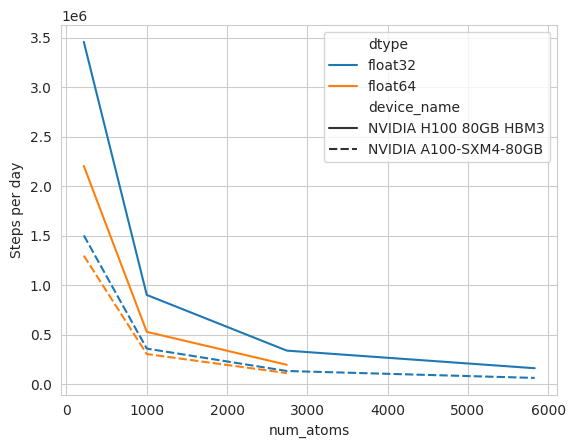

In [2]:
sns.lineplot(df, x="num_atoms", y="Steps per day", hue="dtype", style="device_name")

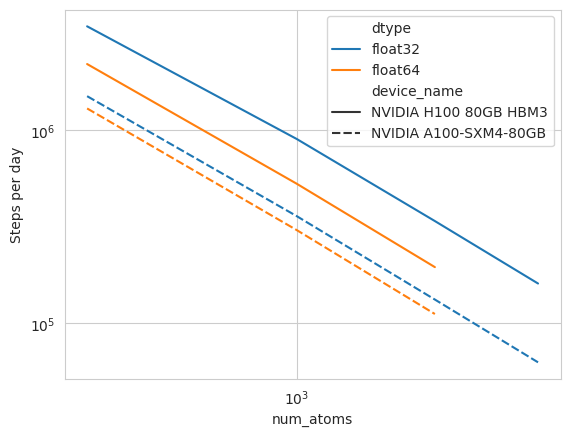

In [4]:
p = sns.lineplot(df, x="num_atoms", y="Steps per day", hue="dtype", style="device_name")
p.set_xscale("log")
p.set_yscale("log")


In [7]:
df64 = df[df["dtype"] == "float64"]
df64


,num_atoms,num_edges,dtype,is_compiled,device_name,median,Steps per day,ns/day (1 fs/step)
4,216,34128,float64,False,NVIDIA H100 80GB HBM3,0.039181,2.204341e+06,2.205176
5,1000,158000,float64,False,NVIDIA H100 80GB HBM3,0.163552,5.283473e+05,0.528272
6,2744,433552,float64,False,NVIDIA H100 80GB HBM3,0.442041,1.954581e+05,0.195457
11,216,34128,float64,False,NVIDIA A100-SXM4-80GB,0.066586,1.297715e+06,1.297564
12,1000,158000,float64,False,NVIDIA A100-SXM4-80GB,0.284252,3.039151e+05,0.303955
13,2744,433552,float64,False,NVIDIA A100-SXM4-80GB,0.773429,1.117122e+05,0.111710


Text(0, 0.5, 'Speedup A100 -> H100')

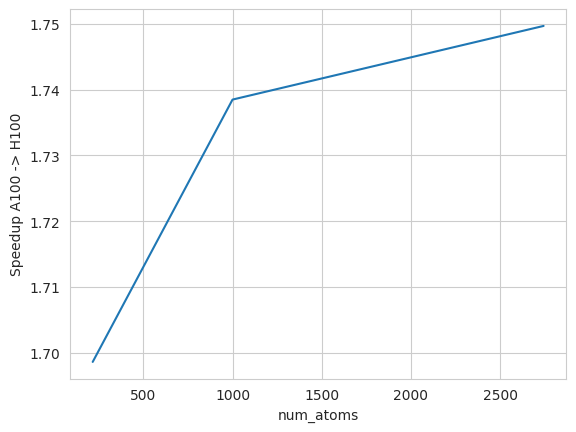

In [19]:
mask = df64["device_name"].str.contains("H100")
speedup = df64[mask]["Steps per day"].values / df64[~mask]["Steps per day"].values

ax = sns.lineplot(x=df64[mask]["num_atoms"], y=speedup)
ax.set_ylabel("Speedup A100 -> H100")
